The aim of this Notebook is to compute numerically premium of contracts and risk measures of contracts in the Cramér-Lundberg model.

In [1]:
import os
import numpy as np
import scipy as scp
import pylab
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.random as rd
import scipy.stats as st
from scipy.stats import halfnorm
l=2     #Parameter lambda of the Poisson process
T=365   #Maturity of the contract

# Part 1 : An example of important sampling using Monte-Carlo

We want to compare the naive MC method and the important sampling one for computing $p:=\mathbb P[X>4]$ with $X \sim \mathcal N(0,1)$

In [2]:
# Print using scipy the numerical approximation of p
# p=
p = 1 - st.norm.cdf(4)
print("The exact value of p using the integral representation is",p)

The exact value of p using the integral representation is 3.167124183311998e-05


We implement the naive estimator $\hat{\mu}_n^{(1)} := \frac1n \sum_{i=1}^n 1_{X_i > 4}$, $X_i \sim \mathcal N(0,1)$

In [3]:
# Compute using Monte-Carlo algorithm the approximated value a of p
#
n = 1000 #
a = 0 #
for i in range(n):
    X = rd.normal(0,1)
    if X >= 4:
        a +=1
a = a/n
print("Estimateur naif",a)
print("Erreur de l'estimateur naif",abs(a-p))

Estimateur naif 0.0
Erreur de l'estimateur naif 3.167124183311998e-05


We implement the important sampling method $\hat{\mu}_2^{(n)} := \frac1n \sum_{i=1}^n 1_{X_i >4} e^{-\theta X_i+\theta^2/2}$, $X_i \sim \mathcal N(\theta,1)$

In [4]:
# Implement b; compare with a
n = 1000 #
b = 0 #
theta = 4 #
for i in range(n):
    X = rd.normal(theta,1)
    if X >= 4:
        b += np.exp(-theta*X + theta**2/2)
b = b/n
print("Estimateur important sampling",b)
print("Erreur de l'estimateur IS",abs(b-p))

Estimateur important sampling 2.7713016628629663e-05
Erreur de l'estimateur IS 3.958225204490315e-06


# Part 2 : The Poisson process in a nutshell

In [5]:
def Jump_Times_Poisson(lam,Te):
    tau=[]
    tau.append(rd.exponential(1/lam))
    while tau[-1] < Te:
        tau.append(tau[-1] + rd.exponential(1/lam))
    #tau is the ordered list of jumps the Poisson process 
    return tau

In [6]:
def plot_Poisson(lam,Te):
    tau=Jump_Times_Poisson(lam,Te)
    N=[0]
    for i in range(1,len(tau)):
        N.append(i)
    plt.step(tau,N,where='post')
    plt.plot(tau,N, 'C0o', alpha=0.5)

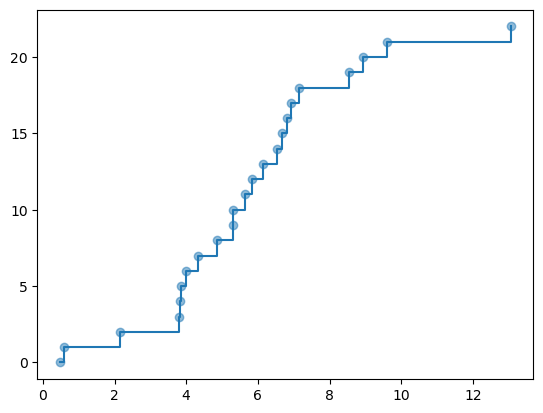

In [7]:
plot_Poisson(l,10)

We compute using the Monte-Carlo algorithm the quantity $\mathbb{E}[N_T]$

In [8]:
def ExpectationPoissonMC(lam,T):
    M=3000
    e=0
    # Write e the estimator of the expectation of N_T
    for i in range(M):
        tau = Jump_Times_Poisson(lam,T)
        e += len(tau)
    e = e/M #
    return e

In [9]:
print('Error=',ExpectationPoissonMC(2,10)-2*10)

Error= 0.9036666666666662


# Part III : Simulation and study of the claims

## 1) Small claims case

Half normal distribution

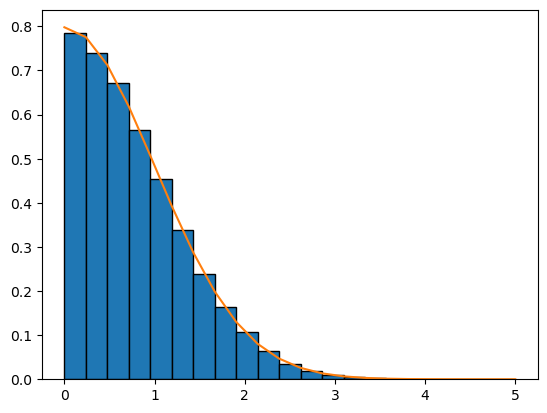

In [10]:
m=0
sig2=1
N=100000
G=st.halfnorm.rvs(m,np.sqrt(sig2),N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
    pb.append((np.sqrt(2)/np.sqrt(sig2*math.pi))*np.exp(-(tk)**2/(2*sig2)))    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

Lognormal distribution

/tmp/ipykernel_4812/3212836077.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
/tmp/ipykernel_4812/3212836077.py:15: RuntimeWarning: divide by zero encountered in log
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
/tmp/ipykernel_4812/3212836077.py:15: RuntimeWarning: invalid value encountered in scalar multiply
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))


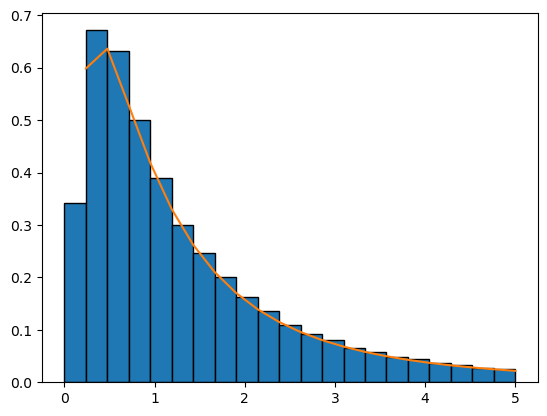

In [11]:
m=0
sig2=1
N=100000
G=np.random.lognormal(m,np.sqrt(sig2),N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
    pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

A Discrete Random variables taking two values

In [12]:
def TwoClaim(N):
    p=0.3
    G= np.random.binomial(1,p,N)
    X=[]
    for i in range (0,len(G)):
        if G[i]==0:
            X.append(1)
        else:
            X.append(5)
    return X

## 2) Large claims case

Weibull distribution

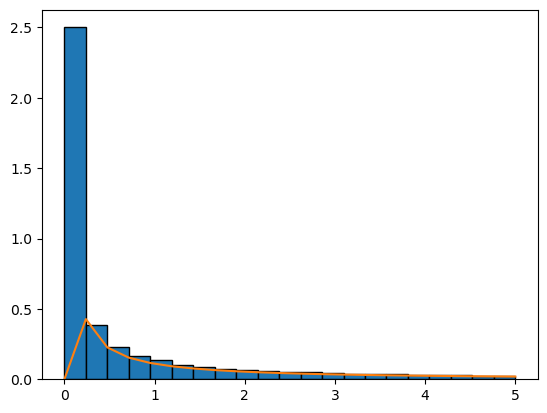

In [13]:
# Coefficient must satisfy : 0 < k < 1 and lambda=1
k=0.3
N=100000
G=np.random.weibull(k,N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5

for l in range(0,2*(n+1)):
    tk=mi+l*(ma-mi)/(2*n+1)
    c.append(tk)
    if tk==0:
        pb.append(0)
    else:
        pb.append(k*(tk)**(k-1)*np.exp(-(tk)**k))    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

Pareto distribution

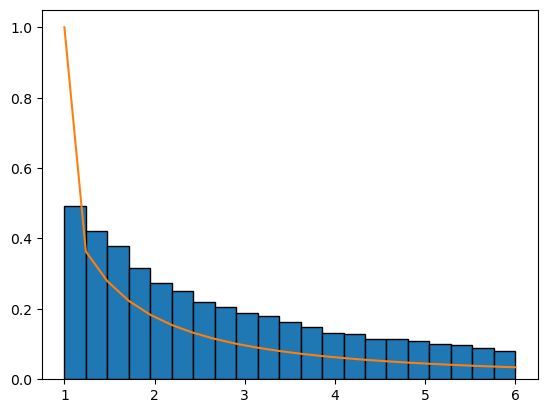

In [14]:
# Here location coefficient is assumed to be 1
k=0.5
N=100000
G=np.random.pareto(k,N)

n=10
pb=[]
c=[]
mi=1
ma=mi+5

for l in range(0,2*(n+1)):
    tk=mi+l*(ma-mi)/(2*n+1)
    c.append(tk)
    if tk==1:
        pb.append(1)
    else:
        pb.append(k/(tk**(k+1)))    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

# Part III : Simulation of the risk process

## 1) Simulation 

#### A plot function

In [15]:
# A plot function (p is a two dimensional array of points on a grid and their value)

def plot_Process(p):
        
    tk=[i[0] for i in p] # We recover the times
    vk=[i[1] for i in p] # We recover the values of R
    
    v0=[0 for i in p]
    Ok=[tk,v0]
 
    plt.plot(tk,vk)
    plt.plot(tk,v0)
    plt.show()

#### Simulation of the claims

In [16]:
Np =100 # N is the number of points on [0,T]

In [17]:
def claim(a,N):
    # N is the number of claims
    # p = 0 : Log normal
    # p = 1 : Bernouilli
    # p = 2 : Weibull
    # p = 3 : Pareto
    # p = 4 : 1 (so that we just study the Poisson process)
    # p = 5 : Gaussian (in order to test the case of a continuous cdf)
    if a==0:
        return np.random.lognormal(0,1,N)
    elif a==1:
        return TwoClaim(N)
    elif a==2:
        return np.random.weibull(0.3,N)
    elif a==3: 
        return np.random.pareto(0.5,N)
    elif a==5:
        return np.random.normal(0,1,N)
    else:
        return np.ones(N)

#### Simulation of the Risk process (returns the discretization of the path)

$$ R_t = u + pt -C_t; \quad C_t = \sum_{i=1}^{N_t} X_i, \; t \geq 0.$$

In [18]:
# Given some jump times J this returns the value of the counting process at time t
def N(t,T,J):
    K=[]
    n=len(J)
    for j in range(0,n):
        K.append(J[j])
    if t==T:
        return n-1
    K.append(T)
    for i in range(0,n):
        if t >=K[i] and t <K[i+1]:
            return i

def C(t,T,J,Cl):
    K=[]
    D=[]
    n=len(J)
    
    for j in range(0,n):
        K.append(J[j])
        D.append(Cl[j])
    
    n=N(t,T,K)
    r=0
    for i in range(0,n+1):
        r=r+D[i]
    return r

In [19]:
def Rprocess(u,p,a,T,lam):
    
    #Discretization grid without the jump times
    Np=100 # Number of time discretization
    tk=[]
    for i in range(0,Np+1):
        tk.append(i*T/Np)
    
    J=Jump_Times_Poisson(lam,T) # We generate the jump times of the Poisson process
    
    temp=claim(a,len(J))
    Cl=[0]
    for k in range(0,len(J)):
        Cl.append(temp[k])
    
    for t in J:
        if t!=0:
            tk.append(t)
    
    tk.sort()
    
    pk=[]
    
    K=[]
    for t in J:
        K.append(t)
        
    L=[]
    for f in Cl:
        L.append(f)
    
    for t in tk:
        pk.append([t,u+p*t-C(t,T,K,L)])
        
    return(pk)

Recall the Net Profit Condition : $\rho:=\frac{\lambda \mathbb{E}[X_1]}{p} < 1$.
This condition is necessary for $\theta(u)>0$ for some $u$ where :
$$ \varphi(u):=\mathbb{P}[\tau(u)=+\infty], \quad \tau(u):=\inf\{t>0, \; R_t<0\}; $$
$$ R_t = u + pt -C_t; \quad C_t = \sum_{i=1}^{N_t} X_i.$$
$\varphi(u)$ is the survival probability given $u$.

In [20]:
def Ruin(u,p,a,Te,lam):
    pk=Rprocess(u,p,a,Te,lam)
    tk=[i[0] for i in pk] # We recover the times
    
    plot_Process(pk)
    
    t=0 # Ruin time (if 0 then no ruin, else is the ruin time)
    
    for temp in pk:
        if temp[1]<0:
            t=temp[0]
            return t
    return t

In [21]:
t=Ruin(10,3,1,10,2)
if t==0:
    print('No ruin')
else:
    print('The ruin time is : ',t)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

## 2) Cramér-Lundberg coefficient and ruin analysis

Recall the Net Profit Condition. Why is it useful for ?  

Recall that for any jump time $\tau_k$ of the Poisson process 
$$R_{\tau_k} = u + p \tau_k -\sum_{i=1}^k X_i = u + \sum_{i=1}^k Y_i,$$
with $Y_i := p W_i - X_i$ and $W_i:=\tau_i -\tau_{i-1}$.
We set 
$$ \kappa:=\inf\{k\geq 1, \; R_{\tau_k} <0\}. $$

#### The small claims case

Study the condition studied during the lectures for insuring no ruin

In [52]:
#We study the lognormal case 
# \mu = E[X_1] = exp(1/2) as we considered the lognormal with mean 0 and variance 1
mu=np.exp(0.5)
lam=2
u=5
c=5
rho=(lam*mu)/c
print('The coefficent =',rho)
if rho<1:
    print('NPC is in force')
else:
    print('NPC fails')
t=Ruin(u,c,0,10,lam)

if t==0:
    print('No ruin')
else:
    print('The ruin time is : ',t)

The coefficent = 0.6594885082800512
NPC is in force


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

#### The large claims case

Study the condition studied during the lectures for insuring no ruin

Recall that if $\tau_k$ denotes a jump time of the Poisson process $N$ that 
$$ R_{\tau_k} = u + p \tau_k - \sum_{i=1}^{k} X_i = u - \sum_{i=1}^{k} Y_i,$$
$Y_i:=X_i-p W_i$, with $W_i:=\tau_i-\tau_{i-1}$, $\tau_0:=0$.

## Ruin as a rare event

We now consider a new family of claims the so-called Gamma distribution 
A random variable $X \sim \Gamma(\alpha,\beta)$ if it admits as a density : 
$$ x \mapsto \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, \; x\geq 0, \quad \Gamma(\alpha):=\int_0^{+\infty} y^{\alpha-1} e^{-y} dy.$$
In Python the `np.random.gamma(alpha,theta)` with $\theta:=\beta^-1$ to simulate a sample of $\Gamma(\alpha,\beta)$.

We consider the CL model as above, with $N$ a Poisson process with paramater $\lambda$ refered as `lam` and with claims $X_i \sim \Gamma(\alpha,\beta)$.  

In [53]:
p=1; alpha=1; lam=0.5; beta=1; T =500; be=1/beta

In [54]:
def Y(p=1,alpha=2.5,beta=0.03,lam=0.005):
    return -p*np.random.exponential(1/lam)+np.random.gamma(alpha,1/beta)

In [33]:
# Create a function MCruin that gives an estimate of the ruin probability over [0,T] as a function of u and n the size of the MC sample
def MCruin(u,n):
    # To be done
MCruin(30,10)

0.0

In [63]:
# Choose u so that MCruin(u,10000) is a rare event
MCruin(10,1000)

0.0

## Shifting the window of sampling
With our choice of random variables $Y$ admits a density $f_Y$. We set $\rho_Y$ the cumulant generating function associated to $Y$,
$$ \rho_Y(\theta):=\ln \int_{\mathbb{R}} \exp(\theta y) f_Y(y) dy.$$
We set $P_\theta$ the measure with respect to which $Y$ has density $\exp(\theta y-\rho(\theta)) f_Y(y)$. Prove that for any non-negative maps $(h_k)_{k\geq 1}$
$$ \mathbb{E}\left[\textbf{1}_{\kappa<+\infty}\prod_{k=1}^{\kappa} h_k(Y_k)\right] = \mathbb{E}_\theta\left[\textbf{1}_{\kappa<+\infty}\prod_{k=1}^{\kappa} h_k(Y_k) \left(\prod_{\ell=1}^{\kappa} \exp(-Y_\ell \theta+\rho(\theta)\right)\right], \quad (\ast) $$

Show that for any $\theta$ in the domain of $\rho_Y$, $\rho_Y'(0) = \mathbb{E}[Y]$ and $\rho_Y'(\theta) = \mathbb{E}_\theta[Y]$.

Deduce that $\theta$ such that $\rho'(\theta) >0$
$$ P_\theta[\tau<+\infty]=1.$$

Deduce that for $\theta$ such that $\rho_Y'(\theta)>0$
$$ P[\kappa<+\infty] = \mathbb{E}_\theta\left[\exp\left(\rho_Y(\theta) \tau -\theta\sum_{\ell=1}^{\kappa} Y_\ell\right)\right], \quad (**).$$

Let $Z$ a random variable with intensity $\exp(\theta z-\rho_Y(\theta)) f_Y(z)$ and let $\tilde{\rho}$ its cumulant generating function. Prove that 
$$ \tilde{\rho}(a) = \rho_Y(a+\theta)-\rho_Y(a).$$

Prove that for $Z \sim \Gamma(\alpha,\beta)$
$$ \rho_Z(\theta) = -\alpha \ln\left(1-\frac{\theta}{\beta}\right), \; \theta \in (-\infty,\beta).$$

Prove that for $Z \sim \mathcal{E}(\lambda)$, 
$$ \rho_Z(\theta) = -\ln\left(1-\frac{\theta}{\lambda}\right), \; \theta \in (-\infty,\lambda).$$

Prove that for $Y = X - p W$ (with $X$ and $W$ independent) 
$$\rho_Y(\theta) = -\alpha \ln\left(1-\frac{\theta}{\beta}\right) - \ln\left(1+\frac{\theta p}{\lambda}\right).$$

Deduce that the cumulant generating function of $Y$ under $P_\theta$ is 
$$ \tilde{\rho}(a)= -\alpha \ln\left(1-\frac{a}{\beta-\theta}\right)-\ln\left(1+\frac{a p}{\lambda+\theta p}\right).$$

Hence, under $P_\theta$, $Y$ has the same law than $\tilde X - p\tilde W$ with $\tilde X \sim \Gamma(\alpha,\beta-\theta)$ and $W \sim \mathcal{E}(\lambda +p\theta)$ with $\tilde X$ and $\tilde W$ independent. 

## Optimal choice of parameter $\theta$

One can show that $\rho_Y$ is a convex mapping and that if $\rho_Y'(0)<0$ (that is $E[Y]<0$) then there exists a unique $\theta^* \in (0,\beta)$ such that $\rho_Y(\theta^*)=0$. This value can be proved to be optimal for the importance sampling method.

## Monte-Carlo importance sampling of the ruin probabiliy

In [64]:
# Create the function MCIS(u,n,\theta) that implements the ruin probability using Expression (**)
def rho(alpha,beta,lam,theta):
    return -alpha*np.log(1-theta/beta)+np.log(1+theta*p/lam)

def MCIS(u,n,theta,p=1, alpha=1, lam=0.5, beta=1, T =500):
    # To be done

MCIS(10,100,0.9)

0.00035353382792986036